## Ames Housing - Linear Regression

We'll be using Linear Regression and the sklearn library to predict house sale prices.

As part of that workflow we'll need to:

1. Split our data into train and test sets
2. Clean and transform the data with new features
3. Determine the best features for our model
4. Test and train our model based on the features we select

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
pd.options.display.width = 99
data = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [12]:
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [13]:
def transform_features(data):
    # Drop unnecessary columns and/or columns that leak
    # info about the sale
    data = data.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type"], axis=1)

    # Drop any columns missing more than 25% of values
    missing_25_percent_or_more = data.isnull().sum() / len(data) >= 0.25
    clean_data = data[missing_25_percent_or_more[missing_25_percent_or_more == False].index]
    
    # Fill in numerical values missing 5% or less with the average value
    numerical_columns = clean_data.select_dtypes(include=["float", "integer"]).columns
    missing_5_percent_or_less = clean_data[numerical_columns].isnull().sum() / len(clean_data) <= 0.05
    
    clean_data[missing_5_percent_or_less[missing_5_percent_or_less == True].index].fillna(clean_data.mean())
    
    # Create new features
    clean_data["years_until_remodel"] = clean_data["Year Remod/Add"] - clean_data["Year Built"]
    clean_data["years_before_sale"] = clean_data["Yr Sold"] - clean_data["Year Built"]
    
    # Drop year sold column that leaks information
    del clean_data["Yr Sold"]
    del clean_data["Year Built"]
    del clean_data["Year Remod/Add"]

    return clean_data

In [15]:
def select_features(data):
    
    return train[columns]

In [16]:
clean_data = transform_features(data)

clean_data.head()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_until_remodel,years_before_sale
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,210,62,0,0,0,0,0,215000,0,50
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,140,0,0,0,120,0,0,105000,0,49
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,393,36,0,0,0,0,12500,172000,0,52
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,244000,0,42
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,212,34,0,0,0,0,0,189900,1,13


In [17]:
for index, row in clean_data.iterrows():
    if row["years_until_remodel"] < 0:
        print(index)
        
for index, row in clean_data.iterrows():
    if row["years_before_sale"] < 0:
        print(index)
        
clean_data.shape


850
2180


(2930, 71)

In [18]:
# Drop bad data rows

clean_data = clean_data.drop([850, 2180], axis=0)

clean_data.shape


(2928, 71)

## Feature Selection

After cleaning and removing bad data. We'll determine the best numerical features to use in our linear regression model, based on the correlation coefficients and our business intuition.

1. We only want to use features with an absolute value of correlation coefficient > 0.50


1. We want to watch out for collinearity or multicollinearity, which is when two or more features are related to one another. The effect can be that it leads to a loss of reiability for the effect of the related features or odd results.

If we think two of more features are related, we will remove one of the duplicative feature




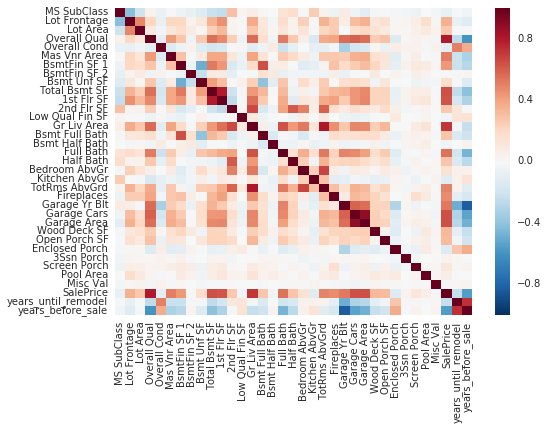

In [19]:
%matplotlib inline
import seaborn as sns

numerical_cols = clean_data.select_dtypes(include=["integer", "float"]).columns

corr = clean_data[numerical_cols].corr()


sns.heatmap(corr)


In [20]:
# Find the best overall features

corr_sale_df = pd.DataFrame(corr["SalePrice"])

significant_corr = abs(corr_sale_df) >= 0.5
significant_corr = corr_sale_df[significant_corr == True]

significant_corr = significant_corr.dropna()

significant_corr


,SalePrice
Overall Qual,0.800279
Mas Vnr Area,0.511688
Total Bsmt SF,0.641467
1st Flr SF,0.632531
Gr Liv Area,0.712893
Full Bath,0.545641
Garage Yr Blt,0.527115
Garage Cars,0.648137
Garage Area,0.641448
SalePrice,1.000000


In [21]:
clean_data[significant_corr.index].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2929
Data columns (total 11 columns):
Overall Qual         2928 non-null int64
Mas Vnr Area         2905 non-null float64
Total Bsmt SF        2927 non-null float64
1st Flr SF           2928 non-null int64
Gr Liv Area          2928 non-null int64
Full Bath            2928 non-null int64
Garage Yr Blt        2769 non-null float64
Garage Cars          2927 non-null float64
Garage Area          2927 non-null float64
SalePrice            2928 non-null int64
years_before_sale    2928 non-null int64
dtypes: float64(5), int64(6)
memory usage: 274.5 KB


NameError: name 'features' is not defined

## Removing duplicative features

We will remove:

1. **Garage Yr Built**, as the year itself isn't very useful (although we could potentially make a feature from the years between the year the house was built and the year the garage was built

1. **Garage Cars**. Garage Area is duplicative and the square feet may be a more useful metric for us as an estimator.


In [23]:
features = ["Overall Qual", "Mas Vnr Area", "Total Bsmt SF",
            "1st Flr SF", "Gr Liv Area", "Full Bath", "Garage Area",
            "years_before_sale"]

target = ["SalePrice"]




In [24]:
# Fill in the null values with the average
missing_value_features = clean_data[features].isnull().sum() > 0

filled_averages = clean_data[missing_value_features[missing_value_features == True].index].fillna(clean_data.mean())

cols = filled_averages.columns

for col in cols:
    clean_data[col] = filled_averages[cols]

clean_data.isnull().sum()

MS SubClass              0
MS Zoning                0
Lot Frontage           490
Lot Area                 0
Street                   0
Lot Shape                0
Land Contour             0
Utilities                0
Lot Config               0
Land Slope               0
Neighborhood             0
Condition 1              0
Condition 2              0
Bldg Type                0
House Style              0
Overall Qual             0
Overall Cond             0
Roof Style               0
Roof Matl                0
Exterior 1st             0
Exterior 2nd             0
Mas Vnr Type            23
Mas Vnr Area             0
Exter Qual               0
Exter Cond               0
Foundation               0
Bsmt Qual               80
Bsmt Cond               80
Bsmt Exposure           83
BsmtFin Type 1          80
                      ... 
Low Qual Fin SF          0
Gr Liv Area              0
Bsmt Full Bath           2
Bsmt Half Bath           2
Full Bath                0
Half Bath                0
B

## Logistic Regression Model

Below we'll create a function that runs our logistic regression model and returns the root mean squared error.

In [40]:
def train_and_test(data):
    row_limit = round(len(data) / 2)
    train = data[:row_limit]
    test = data[row_limit:]
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    
    predictions = lr.predict(test[features])
    
    mse = mean_squared_error(test[target], predictions)
    
    rmse = np.sqrt(mse)
    return rmse
#     return print("The root mean squared error is: " + str(rmse))

    
    


In [41]:
train_and_test(clean_data)


38506.80563392972

In [57]:
def train_and_test_with_k(data, k):
    from sklearn.model_selection import cross_val_score, KFold

    # Determine features and target
    features = ["Overall Qual", "Mas Vnr Area", "Total Bsmt SF",
            "1st Flr SF", "Gr Liv Area", "Full Bath", "Garage Area",
            "years_before_sale"]

    target = ["SalePrice"]

    
    lr = LinearRegression()
    
    # If k = 0, perform holdout validation (50/50 split)
    # Otherwise, perform a cross validation score.
    
    # Split data into train and test sets
    if k == 0:
        row_limit = round((len(data) / 2))
        train = data[:row_limit]
        test = data[row_limit:]
        lr.fit(train[features], train[target])
        predictions = lr.predict(test[features])
        
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        print(str(0), " folds", "RMSE: ", str(rmse))

    elif k == 1:
        row_limit = round((len(data) / 2))
        train = data[:row_limit]
        test = data[row_limit:]
        
        lr.fit(train[features], train[target])
        predictions_one = lr.predict(test[features])
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test[target])
        predictions_two = lr.predict(train[features])
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)

        avg_rmse = np.mean([rmse_one, rmse_two])
    
        print(str(1), " fold", "Average RMSE: ", str(avg_rmse))
    
    else:
        kf = KFold(n_splits = k, shuffle=True)
        rmse_list = []
        for train_index, test_index in kf.split(data):
            train = data.iloc[train_index]
            test = data.iloc[test_index]
            lr.fit(train[features], train[target])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_list.append(rmse)
        print(rmse_list)
        avg_rmse = np.mean(rmse_list)
        print("The average RMSE is: ", str(avg_rmse))
            
            

In [75]:
train_and_test_with_k(clean_data, 10)

[36953.792611494246, 33096.63422494599, 31692.103303434553, 32014.19922041882, 36000.09032214241, 36160.78350762896, 33526.75649272355, 36691.07525325091, 48591.44309602704, 36361.55655563964]
The average RMSE is:  36108.843458770614


In [62]:
train_and_test_with_k(clean_data, 0)

0  folds RMSE:  38506.80563392972


In [63]:
train_and_test_with_k(clean_data, 1)

1  fold Average RMSE:  36501.90549165368


## Next Steps

To make the model better, I'd like to also explore:

1. How can we determine what categorical values are useful for our model?

2. Transform categorical data using the "category" type in Pandas, and use that to create "dummy" columns using the get_dummies function in Pandas to further improve our model